In [2]:
!unzip "/content/drive/MyDrive/Dataset.zip"

Archive:  /content/drive/MyDrive/Dataset.zip
   creating: Training_Set/Normal/
  inflating: Training_Set/Normal/1.jpg  
  inflating: Training_Set/Normal/10.jpg  
  inflating: Training_Set/Normal/100.jpg  
  inflating: Training_Set/Normal/101.jpg  
  inflating: Training_Set/Normal/102.jpg  
  inflating: Training_Set/Normal/103.jpg  
  inflating: Training_Set/Normal/104.jpg  
  inflating: Training_Set/Normal/105.jpg  
  inflating: Training_Set/Normal/106.jpg  
  inflating: Training_Set/Normal/107.jpg  
  inflating: Training_Set/Normal/108.jpg  
  inflating: Training_Set/Normal/109.jpg  
  inflating: Training_Set/Normal/11.jpg  
  inflating: Training_Set/Normal/110.jpg  
  inflating: Training_Set/Normal/111.jpg  
  inflating: Training_Set/Normal/112.jpg  
  inflating: Training_Set/Normal/113.jpg  
  inflating: Training_Set/Normal/114.jpg  
  inflating: Training_Set/Normal/115.jpg  
  inflating: Training_Set/Normal/116.jpg  
  inflating: Training_Set/Normal/117.jpg  
  inflating: Training_

In [3]:
import tensorflow #keras-deep learning library library built on top of tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation #dense layer is fully connected layer. 
#Dropout is to prevent your model from overfitting.
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
#initializing the parameters
image_width,image_height=200,200  #height and width of acceptable images to the model
training_data_dir=r"/content/Training_Set"

testing_data_dir=r"/content/Test_Set"
epochs=70 #70 times the model will learn from the data.
batch_size=20  #takes 20 samples from the dataset

In [5]:
import tensorflow.keras.backend as k
if k.image_data_format()=="channels_first":
  input_shape=(3,image_width,image_height)
else:
  input_shape=(image_width,image_height,3)

In [6]:
trainee_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 rescale=1./255, #rescaling the pixels in range 0-255 to 0-1.
                                 shear_range=0.2, #applies 20% shear strain over image .
                                 zoom_range=0.3, #adjust the zoom in the range of 1-0.3 to 1+0.3.
                                 horizontal_flip=True,vertical_flip=True, #flips the image vertically and horizontally.
                                 rotation_range=360, #rotates the image in range of 0 to 360.
                                 fill_mode='nearest', #after rotating, if the image has whitespaces created then they are filled with the nearest pixels.
                                 width_shift_range=0.2,height_shift_range=0.2, #shifts the image by 20% in horizontal and vertical directions.
                                 brightness_range=[0.4,1.5] #this are the brightness shift values range
                                 )

testee_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255, brightness_range=[0.4,1.5])
trainee_generator=trainee_datagen.flow_from_directory(training_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical", 
                                                  classes=["Normal","Potholes","SpeedBumps"])

validatee_generator=testee_datagen.flow_from_directory(testing_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode="categorical",
                                                      classes=["Normal","Potholes","SpeedBumps"])

Found 978 images belonging to 3 classes.
Found 1165 images belonging to 3 classes.


In [7]:
#tranfer learning with help of vgg16
#loading the vgg16 model


Model1= VGG16(weights="imagenet",include_top=False, input_shape=(200,200,3)) #include_top=false removes the classification layer that was trained on ImageNet 
#dataset 
Model1.trainable=False #set the model as not trainable.
#preprocessing input
Model1.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                              

In [8]:
#making classification layer to fit our model 
from matplotlib.cbook import flatten
from tensorflow.keras import layers, models

flatten_layer=layers.Flatten()
dense_layer1=layers.Dense(50,activation='relu')

dense_layer2=layers.Dense(20,activation='relu')

predictionlayer=layers.Dense(3,activation='sigmoid')

model_20=models.Sequential([Model1,
                         flatten_layer,
                         dense_layer1,
                        Dropout(0.2),
                         dense_layer2,
                         Dropout(0.2),
                         predictionlayer]) #dropout after each dense layer deactivates the 20% nodes of the above layer randomly in each epoch.

In [9]:
from keras.optimizers import SGD


model_20.compile(
    optimizer='adam', loss='categorical_crossentropy',metrics='accuracy' 
)

In [10]:
from keras.callbacks import ReduceLROnPlateau
reduced_lr= ReduceLROnPlateau(monitor='val_loss',factor=0.2, patience=5, min_lr=0.0001)
callback_list=[reduced_lr]

In [11]:
traini=model_20.fit(trainee_generator,steps_per_epoch=35,epochs=epochs, validation_data=validatee_generator,shuffle=True, callbacks=callback_list)

Epoch 1/70
35/35 [==============================] - ETA: 0s - loss: 1.1725 - accuracy: 0.4484

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


35/35 [==============================] - 55s 1s/step - loss: 1.1725 - accuracy: 0.4484 - val_loss: 0.8275 - val_accuracy: 0.7124 - lr: 0.0010
Epoch 2/70
35/35 [==============================] - 40s 1s/step - loss: 0.8219 - accuracy: 0.6275 - val_loss: 0.6290 - val_accuracy: 0.7983 - lr: 0.0010
Epoch 3/70
35/35 [==============================] - 42s 1s/step - loss: 0.7588 - accuracy: 0.6691 - val_loss: 0.4948 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 4/70
35/35 [==============================] - 41s 1s/step - loss: 0.6767 - accuracy: 0.7120 - val_loss: 0.4360 - val_accuracy: 0.8481 - lr: 0.0010
Epoch 5/70
35/35 [==============================] - 41s 1s/step - loss: 0.6086 - accuracy: 0.7471 - val_loss: 0.4139 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 6/70
35/35 [==============================] - 61s 2s/step - loss: 0.6219 - accuracy: 0.7364 - val_loss: 0.5028 - val_accuracy: 0.7957 - lr: 0.0010
Epoch 7/70
35/35 [==============================] - 41s 1s/step - loss: 0.5339 - accuracy: 0.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


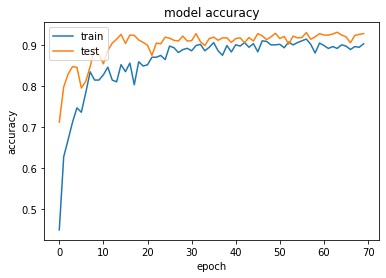

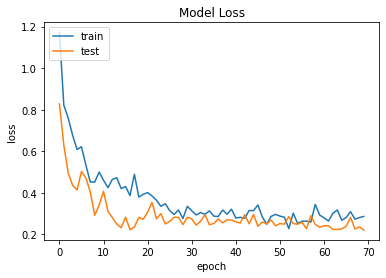

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(traini.history.keys())
#summarize training for accuracy
plt.plot(traini.history['accuracy'])
plt.plot(traini.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc="upper left")
plt.show()
#summarize training for loss
plt.plot(traini.history['loss'])
plt.plot(traini.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
